In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import numpy as np
import logging

from utils.metrics import Metrics
from utils.utils import convertModel
from models.model import Model
from fer2013_dataset import FER2013Dataset

from utils.backprop import Backprop

from utils.viz import visualize_kernels, visualize_feature_maps
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [2]:
# Number of samples to display for image related visualizations!
view_samples = 10

In [3]:
device = torch.device("cpu")


print("Loaded on Device: ", device)
test_dataset = FER2013Dataset("data/fer2013/fer2013/fer2013.csv", "PrivateTest")

test_loader = DataLoader(test_dataset, batch_size=1, shuffle=True, pin_memory=True)

model = Model("results/bestModel.json")
model = convertModel("results/bestModel.pth.tar", model).to(device)


model.eval()


Loaded on Device:  cpu


INFO:models.model:
 
 Creating Model from results/bestModel.json 

INFO:models.blocks:
 
 Added Conv2D block with 
 {'in_channels': 1, 'out_channels': 32, 'kernel_size': 3, 'stride': 1, 'padding': 2, 'activation': 'ReLU', 'normalization': 'BatchNorm2d', 'pooling': {}}
INFO:models.blocks:
 
 Added Conv2D block with 
 {'in_channels': 32, 'out_channels': 32, 'kernel_size': 3, 'stride': 1, 'padding': 2, 'activation': 'ReLU', 'normalization': 'BatchNorm2d', 'pooling': {'type': 'MaxPool2d', 'kernel_size': 2, 'stride': 2}}
INFO:models.blocks:
 
 Added Conv2D block with 
 {'in_channels': 32, 'out_channels': 64, 'kernel_size': 3, 'stride': 1, 'padding': 2, 'activation': 'ReLU', 'normalization': 'BatchNorm2d', 'pooling': {}}
INFO:models.blocks:
 
 Added Conv2D block with 
 {'in_channels': 64, 'out_channels': 64, 'kernel_size': 3, 'stride': 1, 'padding': 1, 'activation': 'ReLU', 'normalization': 'BatchNorm2d', 'pooling': {'type': 'MaxPool2d', 'kernel_size': 2, 'stride': 2}}
INFO:models.blocks:
 


['Training' 'PublicTest' 'PrivateTest']
dict_keys(['state', 'param_groups'])
Loaded Model: results/bestModel.pth.tar successfully


Model(
  (network): ModuleList(
    (0): ConvBlock(
      (conv): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
      (normalization): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (activation): ReLU(inplace=True)
    )
    (1): ConvBlock(
      (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
      (normalization): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (activation): ReLU(inplace=True)
      (pooling): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (2): ConvBlock(
      (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
      (normalization): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (activation): ReLU(inplace=True)
    )
    (3): ConvBlock(
      (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (normalization): BatchNorm2

In [4]:
backprop = Backprop(model)

Registered Hook at: {} Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))


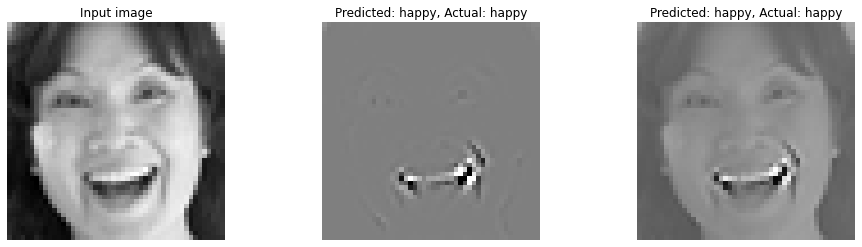

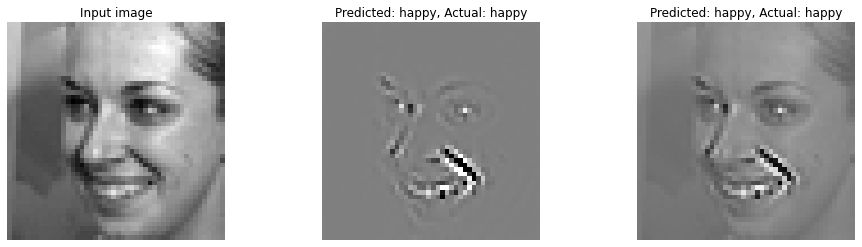

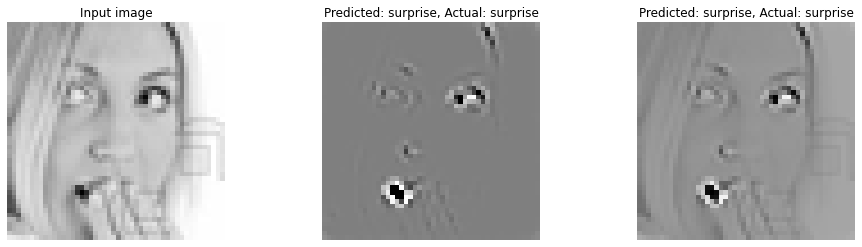

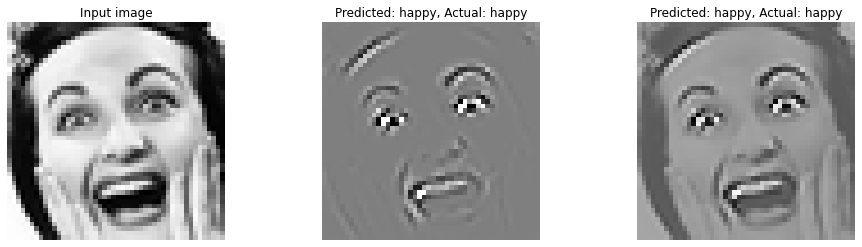

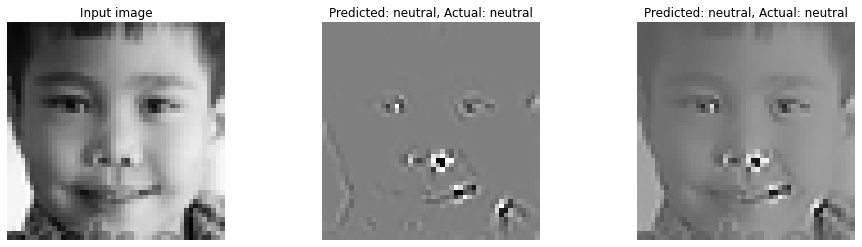

/repos/MSAI/ComputerVision-KEN4255/Emotion-Recognition/utils/backprop.py:100: UserWarning: The predicted class index 2 does notequal the target class index 1. Calculating the gradient w.r.t. the predicted class.
  'Calculating the gradient w.r.t. the predicted class.'


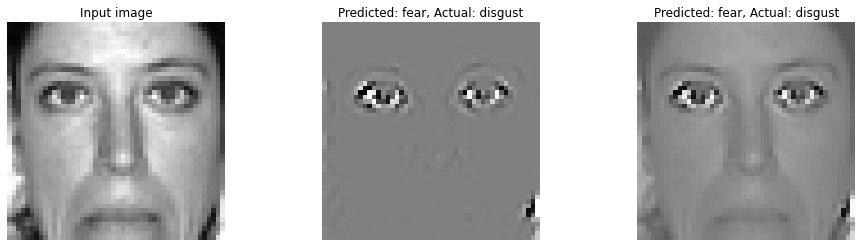

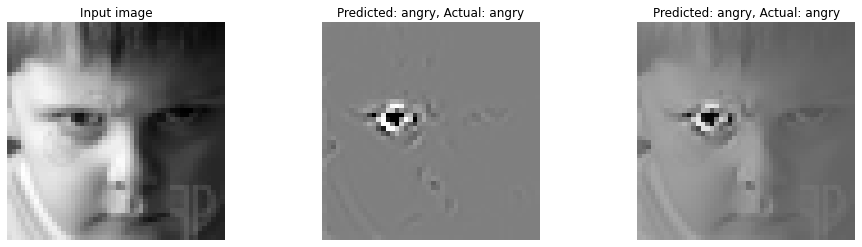

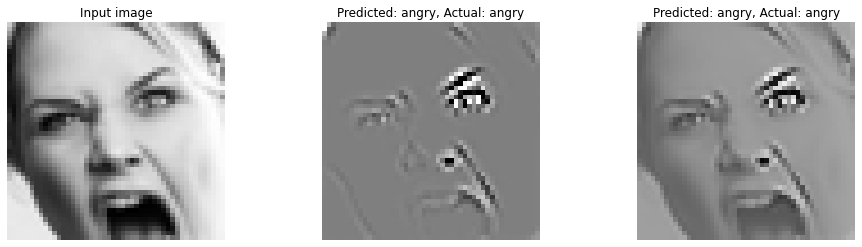

/repos/MSAI/ComputerVision-KEN4255/Emotion-Recognition/utils/backprop.py:100: UserWarning: The predicted class index 1 does notequal the target class index 0. Calculating the gradient w.r.t. the predicted class.
  'Calculating the gradient w.r.t. the predicted class.'


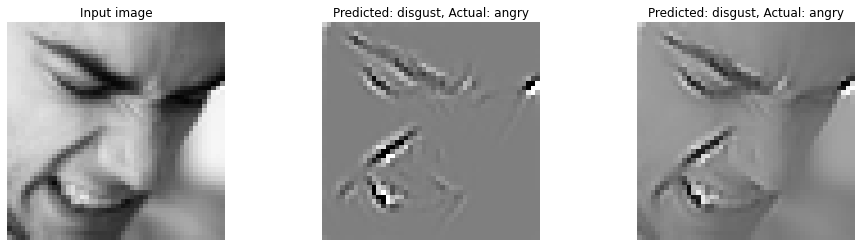

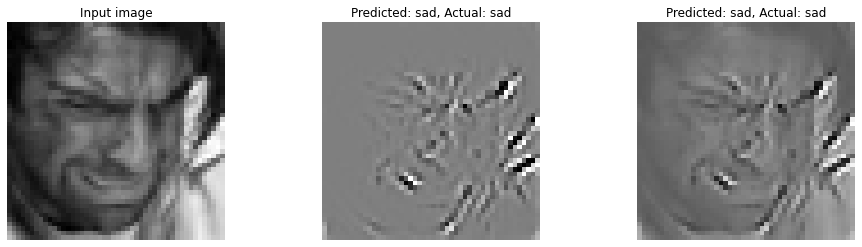

/repos/MSAI/ComputerVision-KEN4255/Emotion-Recognition/utils/backprop.py:100: UserWarning: The predicted class index 6 does notequal the target class index 0. Calculating the gradient w.r.t. the predicted class.
  'Calculating the gradient w.r.t. the predicted class.'


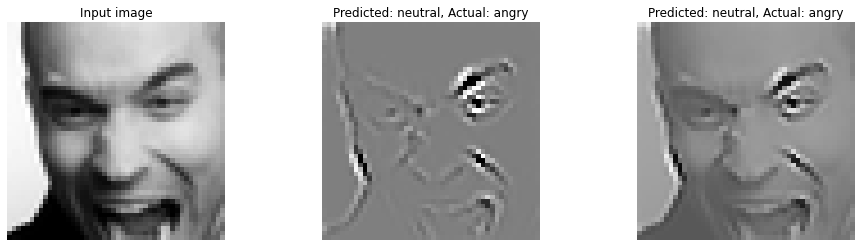

In [5]:
for idx, batch in enumerate(test_loader):
    image, target = batch["image"].to(device), batch["emotion"].to(device)
    image.requires_grad = True
    backprop.visualize(image, target.item(), cmap='gray', guided=True, alpha=0.7, class_mapping=test_dataset.get_class_mapping())
    if idx == view_samples:
        break

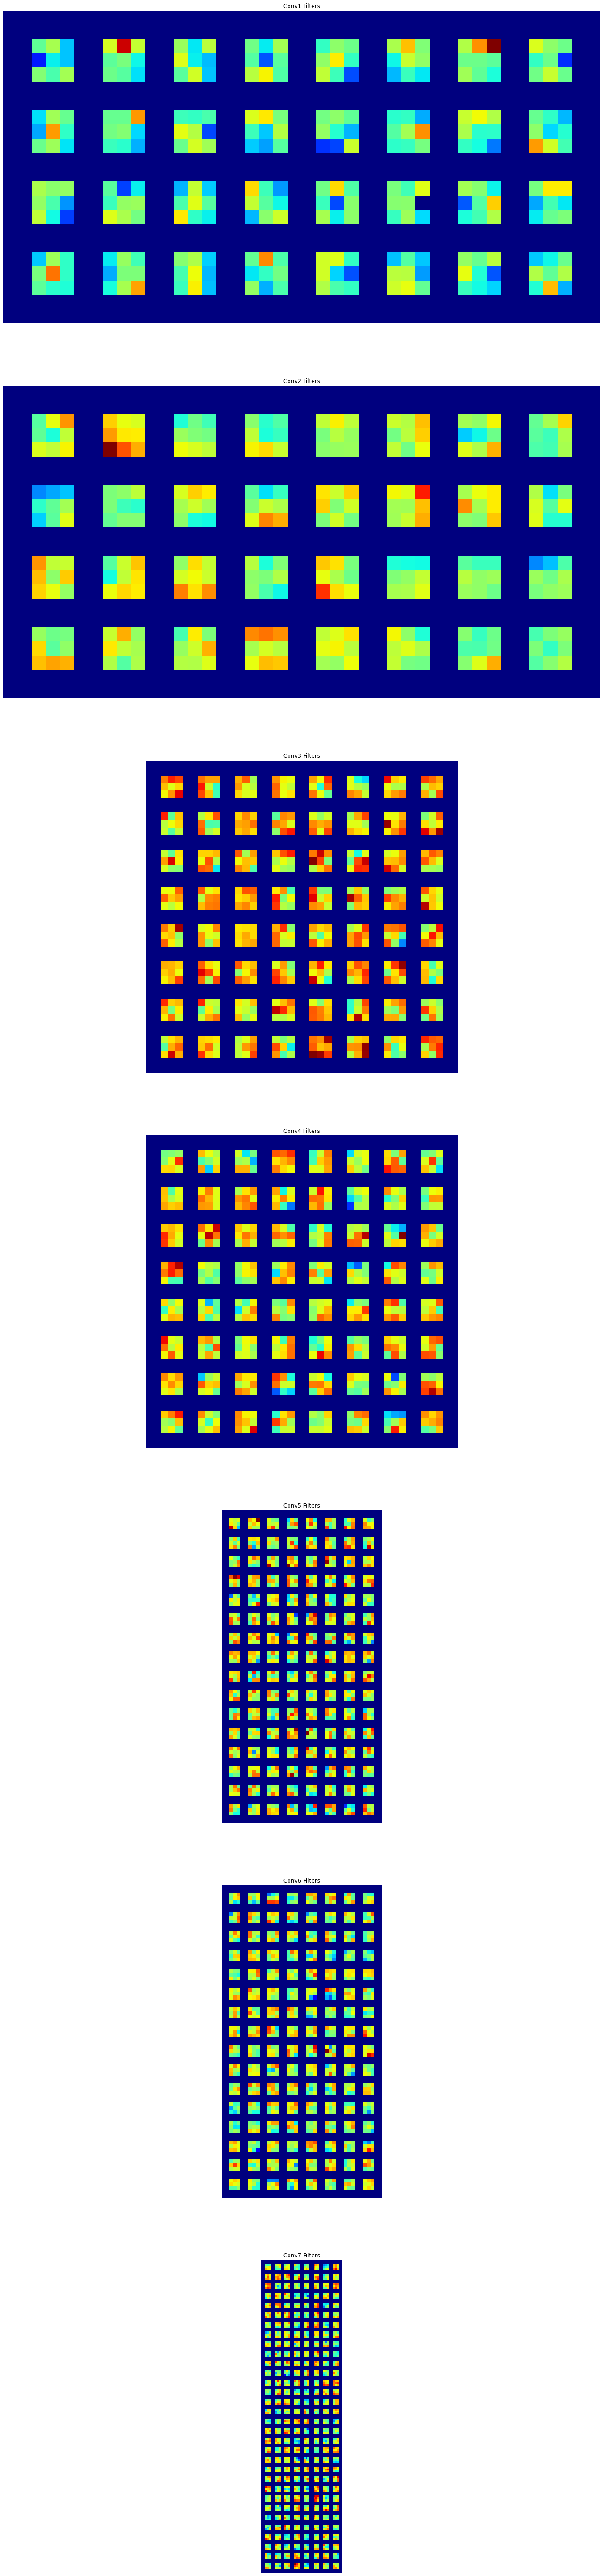

In [6]:
visualize_kernels(model.modules())

In [7]:
activation = visualize_feature_maps(model.modules())


Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
conv1
Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
conv2
Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
conv3
Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
conv4
Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
conv5
Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
conv6
Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
conv7


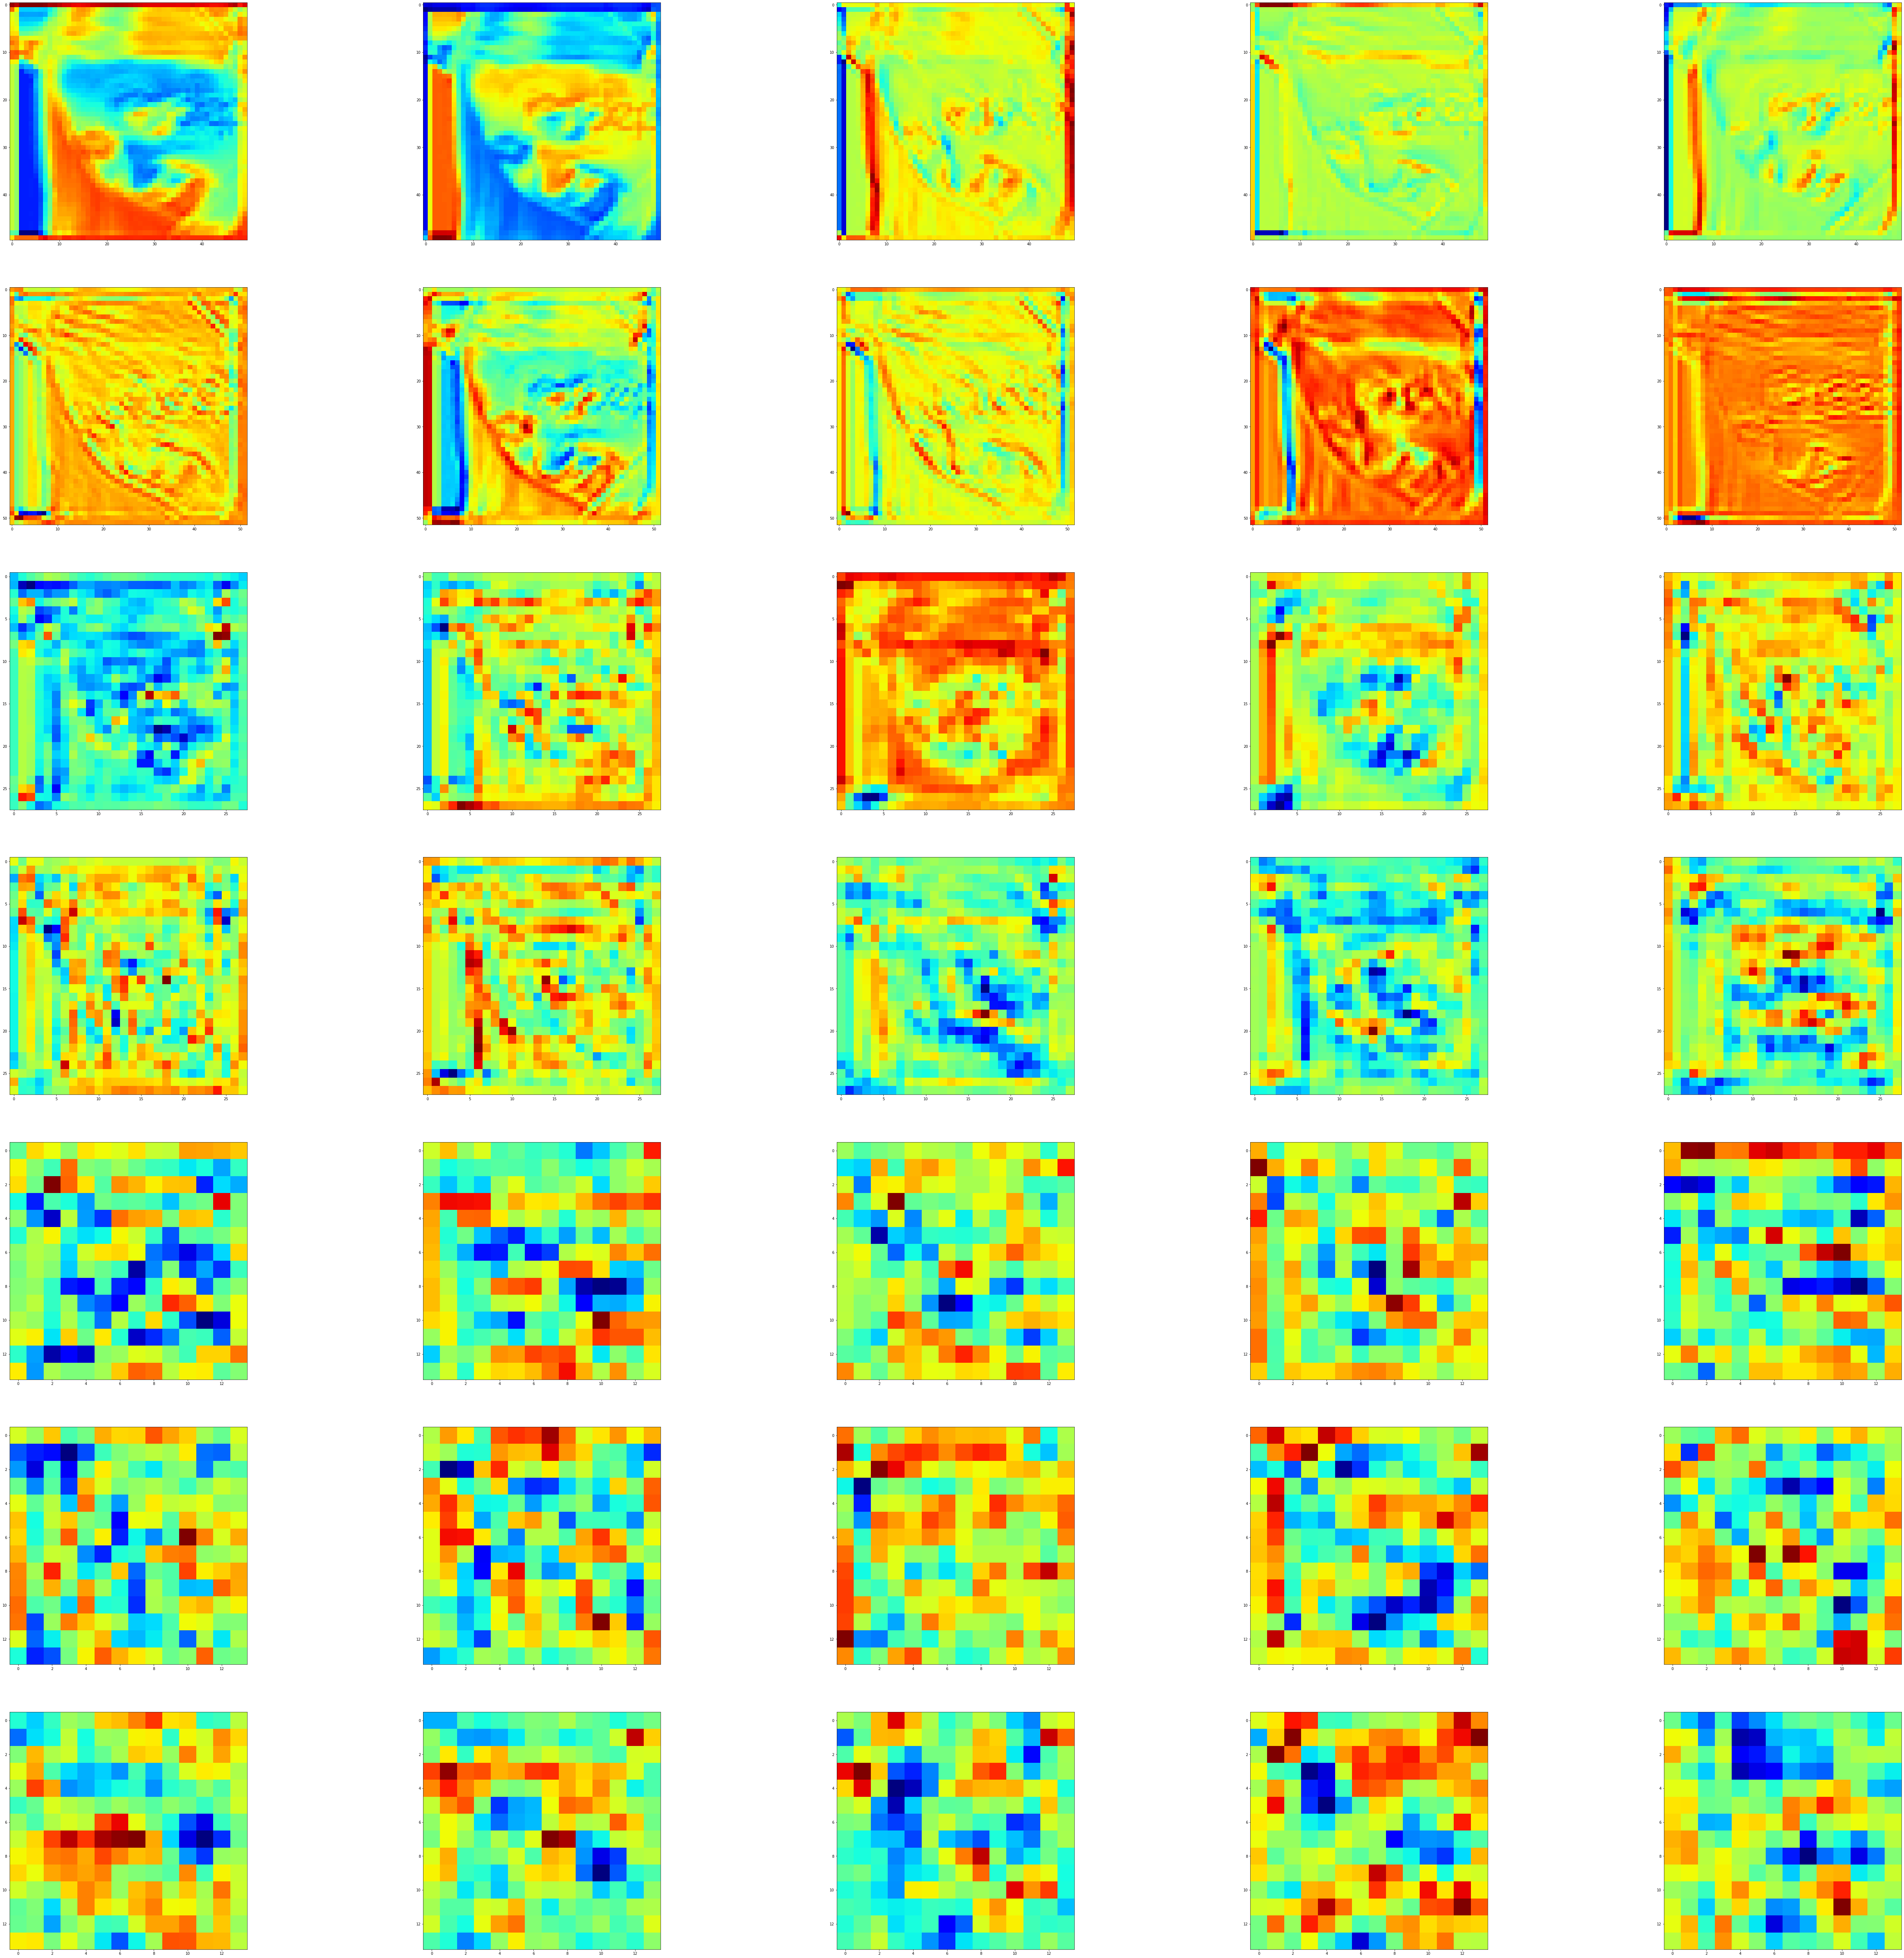

In [9]:
import matplotlib.pyplot as plt


batch = next(iter(test_loader))
image, target = batch["image"].to(device), batch["emotion"].to(device)
out = model(image)
fig, axarr = plt.subplots(len(activation), 5, figsize=(100, 100))

for convidx, act in enumerate(activation):
    act = activation[act].squeeze()
    for idx in range(5):
        axarr[convidx, idx].imshow(act[idx], cmap='jet')